# Model Building

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import keras
from wordcloud import WordCloud
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from model_creation import buildNN
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


## Data Loading

In [3]:
# Reading rating file
dataset = pd.read_csv("games_data.csv")
#Convert user and game ids from int to categories
dataset['user_id'] = dataset['userID'].astype('category').cat.codes.values
dataset['game_id'] = dataset['gameID'].astype('category').cat.codes.values

In [4]:
train, test = train_test_split(dataset, test_size=0.2, random_state=10)

## Building Model

In [5]:
n_users, n_games = len(dataset.user_id.unique()), len(dataset.game_id.unique())
n_latent_factors = 500

model=buildNN(n_users, n_games, n_latent_factors)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Game-Embedding (Embedding)      (None, 1, 500)       1800500     Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 500)       5675500     User[0][0]                       
__________________________________________________________________________________________________
FlattenGam

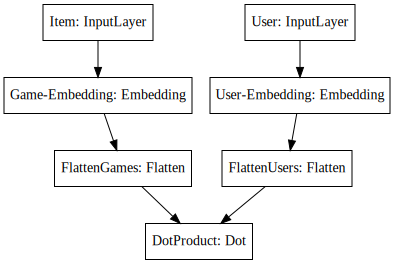

In [6]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Training Model

Train on 45112 samples, validate on 11279 samples
Epoch 1/30
 - 37s - loss: 3.1984 - val_loss: 3.2010
Epoch 2/30
 - 22s - loss: 3.0837 - val_loss: 3.0313
Epoch 3/30
 - 22s - loss: 2.6305 - val_loss: 2.5174
Epoch 4/30
 - 22s - loss: 2.0587 - val_loss: 2.1281
Epoch 5/30
 - 22s - loss: 1.6433 - val_loss: 1.8648
Epoch 6/30
 - 22s - loss: 1.3536 - val_loss: 1.7009
Epoch 7/30
 - 22s - loss: 1.1511 - val_loss: 1.5940
Epoch 8/30
 - 22s - loss: 1.0014 - val_loss: 1.5190
Epoch 9/30
 - 22s - loss: 0.8849 - val_loss: 1.4647
Epoch 10/30
 - 23s - loss: 0.7889 - val_loss: 1.4264
Epoch 11/30
 - 23s - loss: 0.7052 - val_loss: 1.3949
Epoch 12/30
 - 23s - loss: 0.6317 - val_loss: 1.3758
Epoch 13/30
 - 24s - loss: 0.5664 - val_loss: 1.3569
Epoch 14/30
 - 24s - loss: 0.5091 - val_loss: 1.3464
Epoch 15/30
 - 24s - loss: 0.4569 - val_loss: 1.3340
Epoch 16/30
 - 24s - loss: 0.4113 - val_loss: 1.3274
Epoch 17/30
 - 24s - loss: 0.3707 - val_loss: 1.3218
Epoch 18/30
 - 24s - loss: 0.3347 - val_loss: 1.3159
Epoch

Text(0,0.5,'Train Error')

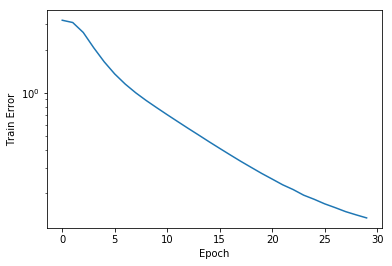

In [5]:
#Callbacks monitor the validation loss# Callb 
#Save the model weights each time the validation loss has improved
callbacks = [EarlyStopping('val_loss', patience=2), 
           ModelCheckpoint('weights.h5', save_best_only=True)]


history = model.fit([train.user_id, train.game_id], train.rating, epochs=30, validation_split=0.2, verbose=2, callbacks=callbacks)

#Show the best validation MAE
min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(history.history['val_loss']))
print ('Minimum RMSE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(abs(min_val_loss)))

pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

In [6]:
model.load_weights('weights.h5')
y_hat = np.round(model.predict([test.user_id, test.game_id]), 0)
y_true = test.rating
np.sqrt(mean_squared_error(y_true, y_hat))

1.7101568530459446